# Implementing Logistic Regression

## Abstract

<!-- Link to [logistic source code](https://github.com/EpicET/EpicET.github.io/blob/main/posts/blog5/logistic.py). -->

This notebook implements a logistic regression model with a gradient descent optimizer. The model is trained on a synthetic dataset, and in where it is optimized at each iteration and also updates loss. There are four experiments conducted. The first experiment tested the model on with vanilla gradient descent plotting the loss per iteration and a decision boundary. The second experiment compared the loss per iterations between the model when using the vanilla descent and when using momentum descent. The third experiment was to overfit the model to the training data and compare it to the accuracy of the model on the test data. The fourth experiment was to test the model on a heart disease prediction dateset. The dataset was split into training, validation, and test data.  The model was trained on the training data and the loss computed for both training and validation. The model was then evaluated on the test data, and the accuracy was reported.

In [ ]:
%load_ext autoreload
%autoreload 2

from logistic import LogisticRegression, GradientDescentOptimizer
import torch

import numpy as np

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)


In [ ]:
The previous cell defines a function `classification_data` that generates synthetic classification data using PyTorch. It creates a dataset with a specified number of points, noise level, and feature dimensions. The function returns feature matrix `X` and label vector `y`. The cell then generates a dataset with added noise and stores the results in `X` and `y`.

## Experiments

### Experiment 1: Vanilla Logistic Regression

In this experiment, I train a logistic regression model using vanilla gradient descent on synthetic data. I monitor the loss over iterations and visualize the decision boundary to evaluate how well the model learns to classify the data.

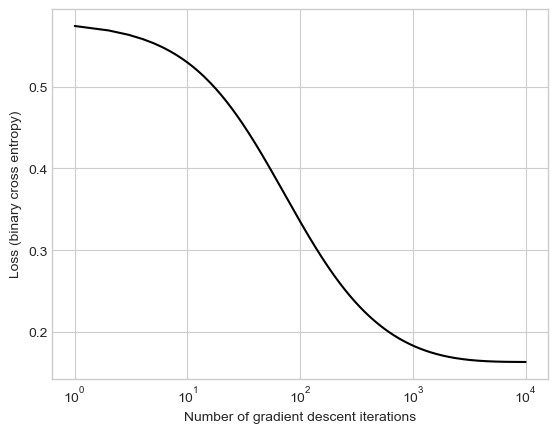

In [ ]:
import matplotlib.pyplot as plt

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []

for _ in range(10000):
    loss = LR.loss(X, y) 
    loss_vec.append(loss)
     
    opt.step(X, y, alpha = 0.1, beta = 0)

  
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

The code above implements a vanilla gradient descent with logistic regression. It is run through a training loop, while keeping track of the loss and storing it in an array called loss_vec. Using loss_vec, I plot a graph showing the loss over gradient iterations. The second graph shows the decision boundary of the data. 
- Loss: This appears to hit convergence with a loss <0.2 at ~10,000 iterations. 
- Decision Boundary: The decision boundary appears to correctly classify the data.

### Experiment 2: Benefits of Momentum

Here, I compare vanilla gradient descent with gradient descent using momentum. By plotting the loss over iterations for both methods, I demonstrate how momentum can accelerate convergence when training logistic regression.

In [6]:
X, y = classification_data(n_points=700, noise = 0.1)

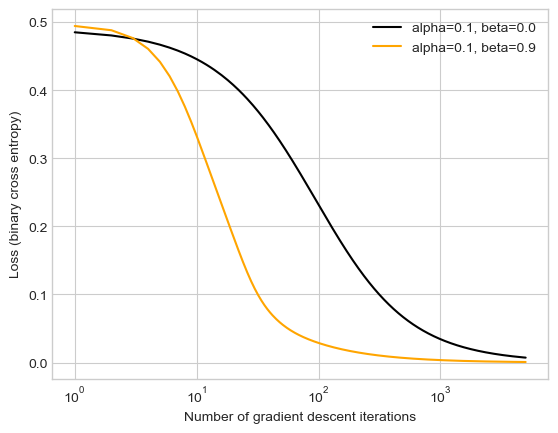

In [7]:
import matplotlib.pyplot as plt
import torch

# Vanilla gradient descent
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec1 = []
iterations = 5000
alpha = 0.1
for _ in range(iterations):
    loss = LR.loss(X, y)
    loss_vec1.append(loss)
    opt.step(X, y, alpha, beta=0.0)  

# Momentum version
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec2 = []
for _ in range(iterations):
    loss = LR.loss(X, y)
    loss_vec2.append(loss)
    opt.step(X, y, alpha, beta=0.9) 


plt.plot(torch.arange(1, len(loss_vec1) + 1), loss_vec1, color="black", label=f"alpha={alpha}, beta=0.0")
plt.plot(torch.arange(1, len(loss_vec2) + 1), loss_vec2, color="orange", label=f"alpha={alpha}, beta=0.9")
plt.semilogx()
plt.xlabel("Number of gradient descent iterations")
plt.ylabel("Loss (binary cross entropy)")
plt.legend()
plt.show()


The code above plots the loss over iterations for both vanilla gradient descent and momentum gradient descent (beta = 0.9) over 5000 iterations with an alpha of 0.1. The loss of both descents begin at ~0.64, but momentum gradient descent drops lower a lot qucker and reaches convergence at ~1000 iterations. Vanilla gradient descent takes ~5000 iterations to reach convergence.

### Experiment 3: Overfitting

This experiment investigates overfitting by training a logistic regression model on high-dimensional data (more features than samples). I compare the model’s accuracy on the training and test sets to highlight the effects of overfitting.

In [ ]:
# Generate training and test data
X_train, y_train = classification_data(n_points= 60, noise = 0.3, p_dims = 100)
X_test, y_test = classification_data(n_points= 60, noise = 0.3, p_dims = 100)

In [ ]:
# Initialize the logistic regression model and optimizer
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

# Train the model using momentum
for _ in range(200): 
    opt.step(X_train, y_train, alpha = 0.01, beta = 0.9)

In [10]:
# Calculate training accuracy
train_predictions = LR.predict(X_train)
train_accuracy = (train_predictions == y_train).float().mean().item()
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate testing accuracy
test_predictions = LR.predict(X_test)
test_accuracy = (test_predictions == y_test).float().mean().item()
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 93.33%


This experiments creates equal data for train and test set with 60 points, 100 dimensions and a noise of 0.3. The model(alpha = 0.01, beta = 0.9) is trained on the training set for 200 iterations,leading to overfitting and a training accuracy of a 100%. The accuracy of the model on the test set is 96.67%, which is rather good given the model was overfitted.

### Experiment 4: Performance on Empirical Data

In this experiment, I apply my logistic regression model to a real-world dataset: the Kaggle [heart disease prediction dataset](https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum). I preprocess the data, train the model, and evaluate its performance on training, validation, and test sets.

In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset from Kaggle
path = kagglehub.dataset_download("shantanugarg274/heart-prediction-dataset-quantum")
print("Path to dataset files:", path)

data_path = path + "/Heart Prediction Quantum Dataset.csv"
df = pd.read_csv(data_path)


Path to dataset files: /Users/emmanueltowner/.cache/kagglehub/datasets/shantanugarg274/heart-prediction-dataset-quantum/versions/1


The data was in 1 csv file with 7 columns representing age, gender, blood pressure, cholesterol, heart rate, quantum pattern feature, and heart disease. 

In [12]:
X_data = df.drop("HeartDisease", axis=1).values
y_data = df["HeartDisease"].values

Since I intend to predict heart disease, I removed that column from the main dataset and used it in the target set.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_data = scaler.fit_transform(X_data)
X_data = torch.tensor(X_data, dtype=torch.float32)
y_data = torch.tensor(y_data, dtype=torch.float32)

The data across features widely varied in range and so I used sci-kit learn's StandardScaler to standardize the both datasets and then converted them into tensors.  The model was trained on the training set and the loss computed for both training and validation. 

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

I also used train_test_split to split the 60% data into training, 20% in validation, and test sets. I had to do this in 2 steps since the you cannot split the data into 3 sets at once. 

Text(0.5, 1.0, 'Validation Loss')

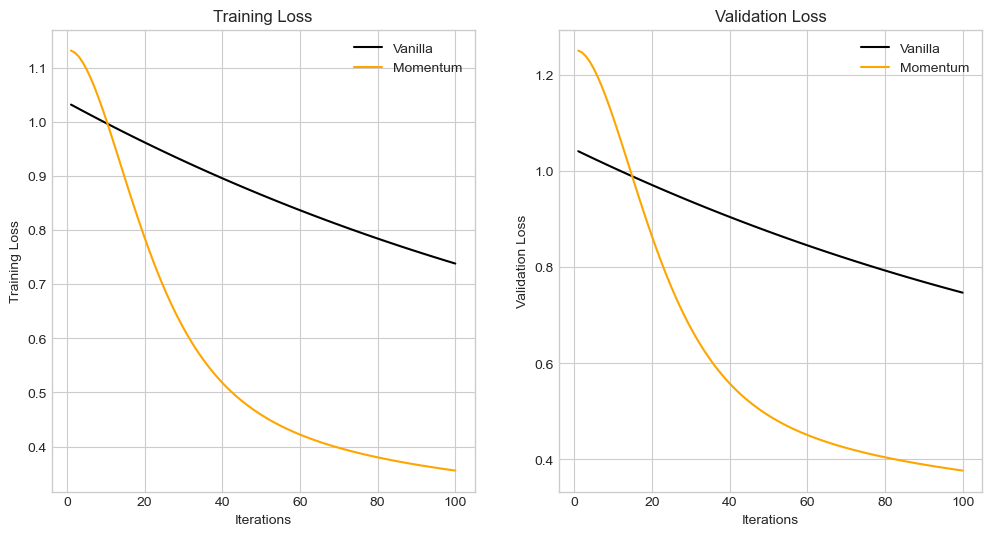

In [15]:
import matplotlib.pyplot as plt
import torch

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Vanilla gradient descent
LRV = LogisticRegression() 
optv = GradientDescentOptimizer(LRV)

v_loss_train = []
v_loss_val = []

iterations = 100
alpha = 0.01
for _ in range(iterations):
    train_loss = LRV.loss(X_train, y_train)
    val_loss = LRV.loss(X_val, y_val)
    v_loss_train.append(train_loss.item())
    v_loss_val.append(val_loss.item())
    optv.step(X_train, y_train, alpha, beta=0.0) 

# Momentum version
LRM = LogisticRegression() 
optm = GradientDescentOptimizer(LRM)

m_loss_train = []
m_loss_val = []
for _ in range(iterations):
    train_loss = LRM.loss(X_train, y_train)
    val_loss = LRM.loss(X_val, y_val)
    m_loss_train.append(train_loss.item())
    m_loss_val.append(val_loss.item())
    optm.step(X_train, y_train, alpha, beta=0.9)  

ax[0].plot(torch.arange(1, iterations + 1), v_loss_train, color="black", label="Vanilla")
ax[0].plot(torch.arange(1, iterations + 1), m_loss_train, color="orange", label="Momentum")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Training Loss")
ax[0].legend()
ax[0].set_title("Training Loss")

ax[1].plot(torch.arange(1, iterations + 1), v_loss_val, color="black", label="Vanilla")
ax[1].plot(torch.arange(1, iterations + 1), m_loss_val, color="orange", label="Momentum")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Validation Loss")
ax[1].legend()
ax[1].set_title("Validation Loss")


The 2 graphs above show the loss over iterations for both training and validation. The model was trained for 100 iterations with an alpha of 0.01 and mommentum beta of 0.9. The graphs were similar to each other and the only the momentum loss(~0.2 for training and ~0.3 for validation) reached convergence at the end.

In [16]:
test_loss = LRM.loss(X_test, y_test)
print(f"Testing Loss: {test_loss.item():.4f}")

# Testing Accuracy
test_predictions = LRM.predict(X_test)
test_accuracy = (test_predictions == y_test).float().mean().item()
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Testing Loss: 0.3732
Testing Accuracy: 83.00%


My model had a loss of 0.38 and accuracy of 83% on the test set. While the accuracy is was decent, the loss was a bit high.

## Discussion

In this blog post, I implemented a logistic regression model with a momentum based optimizer. It successfully achieved convergence with vanilla gradient(beta = 0), then proved the with momentum it could increase speedup. The model was able to overfit the training data and achieve a high accuracy on the test set. The model was also able to learn the heart disease dataset, reach convergence, and achieve a good accuracy. The loss was a bit high, but maybe with more iterations it could be improved.

<!-- In this blog post, I improved my data preprocesssing skills. I learned the purpose of and how to use sci-kit learn's StandardScaler to standardize features. I gained experience converting the recieved data into a useful data types. As always my graphing skills improved with matplotlib and creating line plots.  -->